<a href="https://colab.research.google.com/github/tillu1208/OpenCV/blob/main/02_barcode_reader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bar Code Detection and Decoding using OpenCV and Python

![](https://www.dropbox.com/scl/fi/na6dsv1nc741ugz756otd/Barcode-output.jpg?rlkey=vetf95jdm3p45g5absgjlr6v1&dl=1)


---


This tutorial demonstrates how to detect and decode barcodes in images using `OpenCV`, and the `Pyzbar` library. It covers installing Pyzbar, importing necessary libraries, reading an image file, and applying the decode function to identify barcodes. It includes a function to draw rectangles around detected barcodes and display their data and type. The process is illustrated with code snippets and explanations, showing how to work with barcode images effectively.

### Install Dependencies
Initially, the necessary packages need to imported into the script.

If you see an ugly `ImportError` when importing `pyzbar` on Windows you will most likely need the [Visual C++ Redistributable Packages for Visual Studio 2013](https://www.microsoft.com/en-US/download/details.aspx?id=40784). Install `vcredist_x64.exe` if using **64-bit** Python, `vcredist_x86.exe` if using **32-bit** Python.

In [1]:
import platform

def install_libraries(os_name):
    if os_name == "Windows":
      !pip -qq install pyzbar
    elif os_name == "Linux":
      !apt-get -qq install libzbar0
      !pip -qq install pyzbar
    else:
        print("Unsupported OS")

# Check the operating system
os_name = platform.system()
print(os_name)

# Install libraries based on the OS
install_libraries(os_name)

Linux
Selecting previously unselected package fonts-droid-fallback.
(Reading database ... 121753 files and directories currently installed.)
Preparing to unpack .../00-fonts-droid-fallback_1%3a6.0.1r16-1.1build1_all.deb ...
Unpacking fonts-droid-fallback (1:6.0.1r16-1.1build1) ...
Selecting previously unselected package libfftw3-double3:amd64.
Preparing to unpack .../01-libfftw3-double3_3.3.8-2ubuntu8_amd64.deb ...
Unpacking libfftw3-double3:amd64 (3.3.8-2ubuntu8) ...
Selecting previously unselected package liblqr-1-0:amd64.
Preparing to unpack .../02-liblqr-1-0_0.4.2-2.1_amd64.deb ...
Unpacking liblqr-1-0:amd64 (0.4.2-2.1) ...
Selecting previously unselected package imagemagick-6-common.
Preparing to unpack .../03-imagemagick-6-common_8%3a6.9.11.60+dfsg-1.3ubuntu0.22.04.3_all.deb ...
Unpacking imagemagick-6-common (8:6.9.11.60+dfsg-1.3ubuntu0.22.04.3) ...
Selecting previously unselected package libmagickcore-6.q16-6:amd64.
Preparing to unpack .../04-libmagickcore-6.q16-6_8%3a6.9.11.60

### Library Imports
Import all the required libraries.

In [2]:
# Required packages
import os
import cv2
from pyzbar.pyzbar import decode
import numpy as np
import requests
import matplotlib.pyplot as plt

### Download  The Data

In [3]:
# Check if the file does not exist before downloading
if not os.path.exists("Barcode.png"):
    # URL of the file to be downloaded
    url = "https://www.dropbox.com/scl/fi/rz1n9rs3ruzs5o45x34y6/Barcode.png?rlkey=srr69yrtzlrua4v2khe56gutd&dl=1"

    # Make a GET request to the URL
    response = requests.get(url)

    # Check if the request was successful
    if response.status_code == 200:
        # Open a file in binary write mode and save the content of the response
        with open("Barcode.png", "wb") as file:
            file.write(response.content)
    else:
        print("Failed to download the file.")

### Reading the Input Image
 Before trying to decode the Bar Code image, it needs to be read. In the below cell, the directory path to the image is defined. Here, OpenCV's `imread()` method has been used to read the sample image.

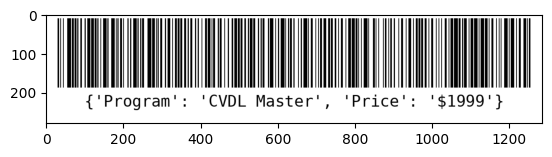

In [4]:
filepath = 'Barcode.png'
inputImage = cv2.imread(filepath)
img = inputImage.copy()
plt.imshow(inputImage)
plt.show(block=False)

### Function to Display the Outputs
We need to ensure that the detected bar codes are converted to the correct format before they are used in the `cv2.rectangle` function. The `det_bar` variable is expected to be a list of bar code instances detected. It has a attribute `rect`, which returns the bounding box center and width and height.

In [5]:
# Function for displaying the rectangle over the bar code
def display(img, det_bar):
    for bar in det_bar:
        x, y, w, h = bar.rect
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 4)
        print(bar.data)
        print(bar.type)

    # Return results
    return img

### Running the Decoder
In the below cell, `decode` method from the pyzbar package is used. We pass the image to the `decoder` method, which eventually gives us the detected Bar codes and their respective information.

In [6]:
# Running the decode function on inputImage
detected_bar_codes = decode(inputImage)

### Display The Results
In the end, the informaton decoded from the Bar code can be printed.

b"{'Program': 'CVDL Master', 'Price': '$1999'}"
CODE128


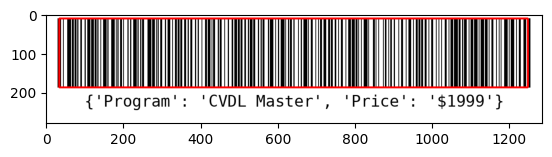

In [7]:
if detected_bar_codes:
    bbox_img = display(img, detected_bar_codes)
    plt.imshow(bbox_img[...,::-1])
    plt.show(block=False)

else:
    print("Barcode not detected")
    plt.imshow(inputImage)

### Save The Results

In [ ]:
cv2.imwrite("Barcode-output.jpg", bbox_img)

True